# Regressão #


In [92]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.linalg as sp
#!pip3 install pandas --user

Objetivo: Implementar um Jupyter Notebook para fazer modelos de regressão para prever a nota da redação no Enem de 2017 de escolas no brasil.




O processo de ajuste de curvas deve:

1. Construir, com os dados disponíveis, diversas opções de curvas de regressão (linear simples, linear múltipla, polinomial simples e múltipla) e descobrir, através de análise de Coeficiente R2, quais os dados que melhor se correlacionam com a nota na redação.

2. Seja criativo e teste o máximo de variações de regressões que conseguir, até ter uma conclusão sólida de quais são as melhores opções para a previsão. Você também pode gerar novas colunas, por exemplo multiplicando, somando ou fazendo outras operações entre várias colunas. Você também pode fazer recortes diferentes dos dados (apenas escolas de determinada região, por exemplo).

3. O objetivo é alcançar modelos de regressão com o maior R2 possível

ESPECIFICAÇÃO DO PROGRAMA

 

O notebook deverá:

 

 

1.     Manipular os dados para gerar as variáveis X e Y para as diversas regressões.

2.     Fazer pelo menos uma regressão simples, uma múltipla com duas variáveis, uma múltipla com 3 variáveis, uma polinomial de grau 2, uma de grau 3 e uma regressão polinomial múltipla (várias variáveis, algumas com grau 2 ou 3).

3.     Para cada curva testada, imprimir o R^2 e plotar os dados e a curva gerada.

In [141]:
def regressaoLinear(x,y):
    xizes = np.zeros([2,2])
    ypslon = np.zeros(2)
    xizes [0][0] = len(x)
    xizes[0][1] = xizes[1][0] = x.sum()
    xizes[1][1] = (x*x).sum()
    ypslon[0] = y.sum()
    ypslon[1] = (x*y).sum()
    return np.linalg.solve(xizes, ypslon)

def regressaoLinearMultipla(x,y): #x é uma matriz ao invés de vetor
    xizes = np.vstack((np.ones(len(x[0])), x))
    ypslon = xizes.dot(y)
    xizes = xizes.dot(xizes.T)
    return np.linalg.solve(xizes,ypslon)
    
    return b

def resolveLinVet(b,x):
    return b[0]+(b[1:]*x).sum(axis=1)

def resolveLin(b,x):
    return b[0]+b[1:]*x

def distanciaquad(y,yp):
    return ((y-yp)**2).sum()
    
def r2(y,yp):
    return 1- distanciaquad(y,yp)/((y-yp.mean())**2).sum()


In [128]:
enem = pd.read_csv('microdados enem.csv', encoding = 'iso-8859-1', delimiter = ';')
#enem.info()
#enem.TP_LOCALIZACAO_ESCOLA.value_counts()
#enem.CO_MUNICIPIO_ESCOLA.value_counts()
enem.TP_DEPENDENCIA_ADM_ESCOLA.value_counts()

2    114546
4     53596
3      2262
1      1901
Name: TP_DEPENDENCIA_ADM_ESCOLA, dtype: int64

### Regressão linear simples

In [129]:
#enem.NU_ANO.value_counts()
#enem.NU_TAXA_APROVACAO.value_counts()
#enem.NO_MUNICIPIO_ESCOLA.value_counts()
#enem.NU_MEDIA_RED.value_counts()


#tentar y = notas da redaçao enem
#fazer recortes dos dados




# Y = a Taxa de participação com a media total

#enem.NU_MEDIA_TOT.value_counts()
#enem.NU_TAXA_PARTICIPACAO.value_counts()

In [130]:
#x = vg[(vg.Critic_Score.notnull()) & vg.NA_Sales.notnull()].Critic_Score
#relaçao escola estado
#x = enem[(enem.NU_MEDIA_TOT.notnull() & enem.NU_ANO.notnull())].NU_ANO
#y = enem[(enem.NU_MEDIA_TOT.notnull() & enem.NU_ANO.notnull())].NU_MEDIA_TOT


#y = enem[(enem.NU_TAXA_APROVACAO.notnull() & enem.NU_MEDIA_RED.notnull())].NU_MEDIA_RED
#x = enem[(enem.NU_TAXA_APROVACAO.notnull() & enem.NU_MEDIA_RED.notnull())].NU_TAXA_APROVACAO

#plt.scatter(x,y)
#plt.show()

In [131]:
#x = enem[(enem.NU_TAXA_PARTICIPACAO.notnull() & enem.NU_MEDIA_RED.notnull())].NU_TAXA_PARTICIPACAO
#y = enem[(enem.NU_TAXA_PARTICIPACAO.notnull() & enem.NU_MEDIA_RED.notnull())].NU_MEDIA_RED

#plt.scatter(x,y)
#plt.show()

Podemos ver que de acordo com a participaçao dos alunos de todas as escolas do brasil, existe uma correlaçao com a media das redaçoes tambem do brasil.

In [132]:
#enem[enem.NU_PARTICIPANTES_NEC_ESP.notnull()].sort_values(['NU_PARTICIPANTES_NEC_ESP'],ascending=False)
enem.info()
#enem.INSE.value_counts()
#enem.TP_LOCALIZACAO_ESCOLA.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172305 entries, 0 to 172304
Data columns (total 27 columns):
NU_ANO                       172305 non-null int64
CO_UF_ESCOLA                 172305 non-null int64
SG_UF_ESCOLA                 172305 non-null object
CO_MUNICIPIO_ESCOLA          172305 non-null int64
NO_MUNICIPIO_ESCOLA          172305 non-null object
CO_ESCOLA_EDUCACENSO         172305 non-null int64
NO_ESCOLA_EDUCACENSO         172305 non-null object
TP_DEPENDENCIA_ADM_ESCOLA    172305 non-null int64
TP_LOCALIZACAO_ESCOLA        172305 non-null int64
NU_MATRICULAS                172305 non-null int64
NU_PARTICIPANTES_NEC_ESP     45355 non-null float64
NU_PARTICIPANTES             172305 non-null int64
NU_TAXA_PARTICIPACAO         104687 non-null float64
NU_MEDIA_CN                  104687 non-null float64
NU_MEDIA_CH                  104687 non-null float64
NU_MEDIA_LP                  104687 non-null float64
NU_MEDIA_MT                  104687 non-null float64
NU_MEDIA

65.05 %


/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


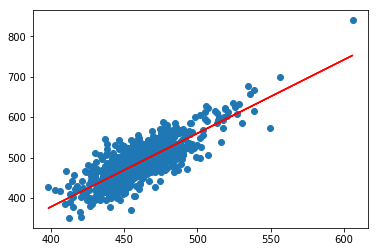

In [133]:
enemLimpao = enem[(enem.NU_MEDIA_LP.notnull() 
                   & enem.NU_MEDIA_RED.notnull())]


x = enemLimpao[(enem.INSE.isin(['Grupo 1']))].NU_MEDIA_LP 
y = enemLimpao[(enem.INSE.isin(['Grupo 1']))].NU_MEDIA_RED
#taxa de participaçao nas ediçoes do enem pela medias das redaçoes totais, pelo grupo 1 do Inse médio mais baixo das escolas

plt.scatter(x,y)
ypred = resolveLin(regressaoLinear(np.array(x),np.array(y)), x)
    
plt.plot(x,ypred,'r-')

porcentoRLS = r2(y,ypred)*100
print(round(porcentoRLS, 2), "%")

plt.show()

0.5384160549543959


/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


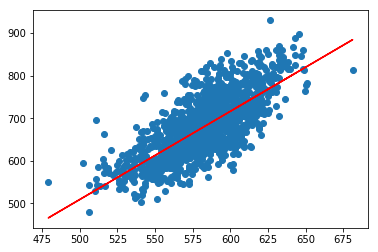

In [134]:
enemLimpao = enem[(enem.NU_MEDIA_LP.notnull() 
                   & enem.NU_MEDIA_RED.notnull())]


x = enemLimpao[(enem.INSE.isin(['Grupo 6']))].NU_MEDIA_LP 
y = enemLimpao[(enem.INSE.isin(['Grupo 6']))].NU_MEDIA_RED
#taxa de participaçao nas ediçoes do enem pela medias das redaçoes totais, pelo grupo 1 do Inse médio mais baixo das escolas


plt.scatter(x,y)
ypred = resolveLin(regressaoLinear(np.array(x),np.array(y)), x)
plt.plot(x,ypred,'r-')

print(r2(y,ypred))

plt.show()

Indicador de Nível Socioeconômico da escola - Para melhor descrever o nível socioeconômico das escolas, foram criados seis grupos, de forma que o Grupo 1 congrega as escolas com Inse médio mais baixo e o Grupo 6, com mais alto. (Edição 2015) 4

### Regressão linear multipla

In [135]:
def regressaoLinearMultipla(X,y): #x é uma matriz ao invés de vetor
    xizes = np.vstack((np.ones(len(x[0]))), x)
    ypslon = xizes.dot(y)
    xizes = xizes.dot(xizes.T)
    return np.linalg.solve(xizes,ypslon)

def resolveLinVet(b,x):
    return b[0]+(b[1:]*xpquad).sum(axis=1)

#def resolveLin(b,x):
   # return b[0] + (b[1:]*x).sum()
    

0.5407906453050756


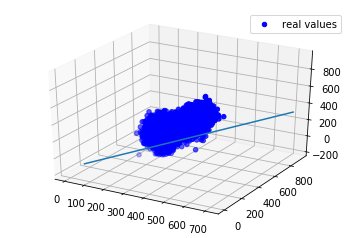

In [152]:
enemLimpao = enem[(enem.NU_TAXA_PARTICIPACAO.notnull() & 
                   enem.NU_MEDIA_LP.notnull() &
                   enem.NU_MEDIA_RED.notnull())]

#x1 = enemLimpao.NU_TAXA_PARTICIPACAO
#x2 = enemLimpao.NU_MEDIA_LP

x1 = enemLimpao.NU_MEDIA_LP 
x2 = enemLimpao.NU_TAXA_PARTICIPACAO


x = np.array([x1,x2])
y = np.array(enemLimpao.NU_MEDIA_RED)

b = regressaoLinearMultipla(x,y)
xplot = np.linspace(x.min(),x.max(),200)
yplot = np.linspace(y.min(),y.max(),200)
xs = np.array([xplot,yplot])
zplot = resolveLinVet(b,xs.T)


ypred = resolveLinVet(b,x.T)

print(r2(y,ypred))


fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xplot,yplot,zplot)
ax.scatter(x1, x2, y,label='real values',marker='o',color='b')
ax.legend()
plt.show()


### Regressão polinomial simples

0.5384160549543959


/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


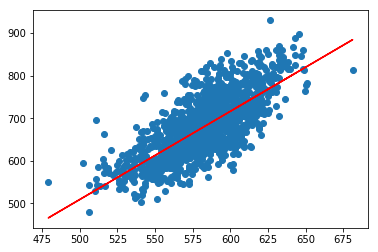

In [153]:
enemLimpao = enem[(enem.NU_MEDIA_LP.notnull() 
                   & enem.NU_MEDIA_RED.notnull())]


x = enemLimpao[(enem.INSE.isin(['Grupo 6']))].NU_MEDIA_LP 
y = enemLimpao[(enem.INSE.isin(['Grupo 6']))].NU_MEDIA_RED
#taxa de participaçao nas ediçoes do enem pela medias das redaçoes totais, pelo grupo 1 do Inse médio mais baixo das escolas


plt.scatter(x,y)
ypred = resolveLin(regressaoLinear(np.array(x),np.array(y)), x)
plt.plot(x,ypred,'r-')

print(r2(y,ypred))

plt.show()




### Regressão polinomial multipla

0.525886950648434


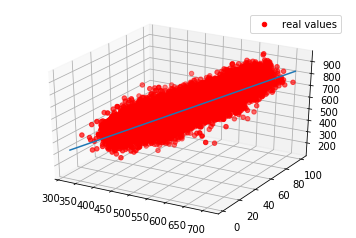

In [150]:
enemLimpao = enem[(enem.NU_TAXA_PARTICIPACAO.notnull() & 
                   enem.NU_MEDIA_LP.notnull() &
                   enem.NU_MEDIA_RED.notnull())]

#x1 = enemLimpao.NU_TAXA_PARTICIPACAO
#x2 = enemLimpao.NU_MEDIA_LP

x1 = enemLimpao.NU_MEDIA_LP 
x2 = enemLimpao.NU_TAXA_PARTICIPACAO


x = np.array([x1,x2*x2])
y = np.array(enemLimpao.NU_MEDIA_RED)

b = regressaoLinearMultipla(x,y)
xplot = np.linspace(x1.min(),x1.max(),200)
yplot = np.linspace(x2.min(),x2.max(),200)
xs = np.array([xplot,yplot])
zplot = resolveLinVet(b,xs.T)


ypred = resolveLinVet(b,x.T)

print(r2(y,ypred))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xplot,yplot,zplot)
ax.scatter(x1, x2, y,label='real values',marker='o',color='r')
ax.legend()
plt.show()

# Visualizaçao dos dados

### Diagrama de Dispersão

In [ ]:
x = np.array([0.3, 2.7, 4.5, 5.9, 7.8])
y = np.array([1.8, 1.9, 3.1, 3.9, 3.3])


def constroiFuncao(x,y):
    u = np.zeros(len(x))
    for i in range(len(x)+1):
        u = y[i]+((y[i+1]-y[0])/(x[i+1]-x[i]))*(x[i]-x[i])
    return u

constroiFuncao(x,y)

In [ ]:
plt.scatter(x,y) #plot grafico de dispersao
plt.plot(0.3,)
plt.show()

##### Retas de regressão:

Um modelo simples que relaciona duas variaveis $x$ e $y$:

$ y = beta0 + beta1*x +epson1$

In [ ]:
def regressaoLinear(x,y):
    xizes = np.zeros((2,2))
    ypslon = np.zeros(2)
    xizes [0][0] = len(x)
    xizes[0][1] = xizes[1][0]
    xizes[1][1] = (x*x).sum()
    ypslon[0] = y.sum()
    ypslon[1] = (x*y).sum()
    
    #b = np.linalg(xizes,ypslon)
    return xizes, ypslon




In [ ]:
resolver sistema
gauss


funçao que dados os coeficientes calcula o valor de f(x)